In [5]:
!pip install seaborn



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity



In [7]:
df = pd.read_csv("movierecomm.csv")

In [8]:
df

,title,genres,overview,rating,popularity,year,revenue
0,Inception,"Action, Sci-Fi",A thief uses dream-sharing tech to steal secrets.,8.8,90.0,2010.0,8.298951e+08
1,Interstellar,"Adventure, Sci-Fi",A team travels through a wormhole.,8.6,85.0,2014.0,6.774713e+08
2,The Dark Knight,"Action, Crime",Batman fights Joker.,9.0,95.0,2008.0,1.004558e+09
3,Avatar,"Action, Adventure",NaN,7.8,88.0,2009.0,2.847246e+09
4,The Matrix,"Action, Sci-Fi",A hacker discovers reality.,8.7,80.0,1999.0,4.663648e+08
5,Shutter Island,"Mystery, Thriller",Marshals investigate asylum.,8.1,70.0,2010.0,2.948042e+08
6,Titanic,"Romance, Drama",A love story on Titanic.,7.9,92.0,1997.0,2.264803e+09
7,The Avengers,NaN,Heroes unite to save world.,8.0,89.0,2012.0,1.518813e+09
8,Iron Man,"Action, Sci-Fi",A billionaire builds a suit.,7.9,75.0,2008.0,5.851797e+08
9,Thor,"Action, Fantasy",A god learns humility.,7.0,65.0,2011.0,4.493266e+08


In [9]:
df.head()

,title,genres,overview,rating,popularity,year,revenue
0,Inception,"Action, Sci-Fi",A thief uses dream-sharing tech to steal secrets.,8.8,90.0,2010.0,8.298951e+08
1,Interstellar,"Adventure, Sci-Fi",A team travels through a wormhole.,8.6,85.0,2014.0,6.774713e+08
2,The Dark Knight,"Action, Crime",Batman fights Joker.,9.0,95.0,2008.0,1.004558e+09
3,Avatar,"Action, Adventure",NaN,7.8,88.0,2009.0,2.847246e+09
4,The Matrix,"Action, Sci-Fi",A hacker discovers reality.,8.7,80.0,1999.0,4.663648e+08


In [10]:
df.tail()

,title,genres,overview,rating,popularity,year,revenue
30,WALL-E,"Animation, Sci-Fi",Robot cleans Earth.,8.4,NaN,2008.0,521311860.0
31,Finding Nemo,"Animation, Adventure",Fish searches for son.,8.2,71.0,NaN,940335536.0
32,Inside Out,"Animation, Family",Girl's emotions struggle.,8.1,73.0,2015.0,NaN
33,Annabelle,"Horror, Thriller",A haunted doll terrorizes couple.,5.4,55.0,2014.0,257000000.0
34,The Conjuring,"Horror, Mystery",Paranormal investigators help family.,7.5,65.0,2013.0,NaN


In [12]:
df.shape

(35, 7)

In [13]:
df.size

245

In [14]:
df.dtypes

title          object
genres         object
overview       object
rating        float64
popularity    float64
year          float64
revenue       float64
dtype: object

In [16]:
df.describe()

,rating,popularity,year,revenue
count,34.000000,32.000000,33.000000,3.200000e+01
mean,7.920588,74.125000,2012.606061,1.306182e+09
std,0.707012,11.468751,6.791260,1.349112e+09
min,5.400000,52.000000,1995.000000,1.156032e+08
25%,7.650000,65.000000,2009.000000,5.097339e+08
50%,8.100000,73.500000,2014.000000,8.419476e+08
75%,8.375000,82.750000,2018.000000,1.389888e+09
max,9.000000,95.000000,2023.000000,6.500000e+09


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   title       35 non-null     object 
 1   genres      33 non-null     object 
 2   overview    32 non-null     object 
 3   rating      34 non-null     float64
 4   popularity  32 non-null     float64
 5   year        33 non-null     float64
 6   revenue     32 non-null     float64
dtypes: float64(4), object(3)
memory usage: 2.0+ KB


In [18]:
df.isnull().sum()


title         0
genres        2
overview      3
rating        1
popularity    3
year          2
revenue       3
dtype: int64

In [19]:
#Handle missing text
df["genres"] = df["genres"].fillna("unknown genre")
df["overview"] = df["overview"].fillna("no overview available")


In [20]:
df["rating"] = df["rating"].fillna(df["rating"].median())
df["popularity"] = df["popularity"].fillna(df["popularity"].median())
df["year"] = df["year"].fillna(df["year"].median())
df["revenue"] = df["revenue"].fillna(df["revenue"].median())


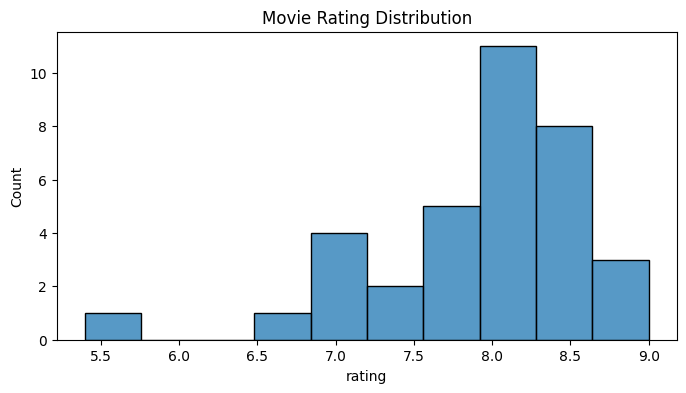

In [21]:
plt.figure(figsize=(8,4))
sns.histplot(df["rating"], bins=10)
plt.title("Movie Rating Distribution")
plt.show()


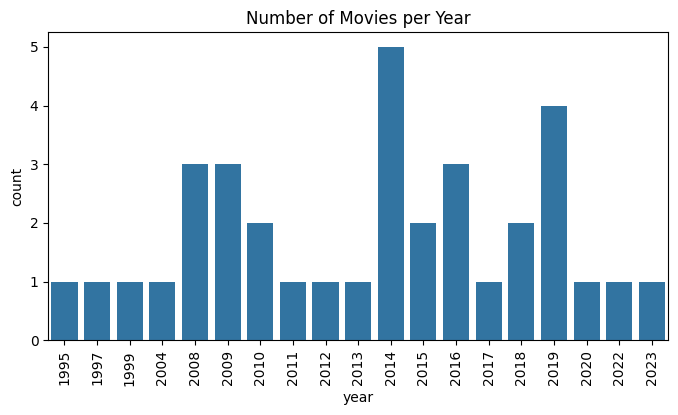

In [22]:
plt.figure(figsize=(8,4))
sns.countplot(x=df["year"].astype(int))
plt.xticks(rotation=90)
plt.title("Number of Movies per Year")
plt.show()


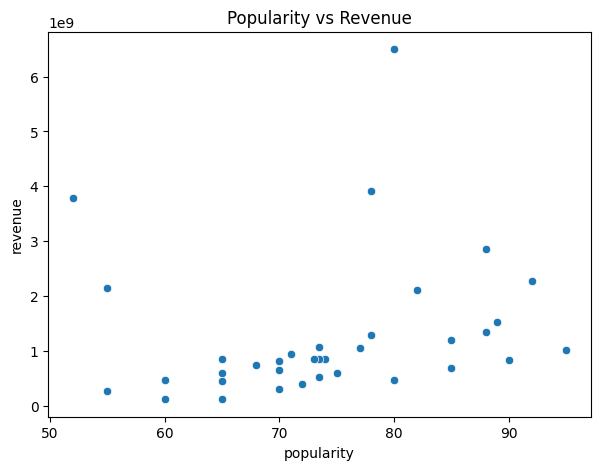

In [23]:
plt.figure(figsize=(7,5))
sns.scatterplot(x="popularity", y="revenue", data=df)
plt.title("Popularity vs Revenue")
plt.show()


In [24]:
#combine text fields to train TF-IDF

In [25]:
df["combined_text"] = df["genres"] + " " + df["overview"]


In [26]:
#TF-IDF Vectorization

vectorizer = TfidfVectorizer(stop_words="english")

tfidf_matrix = vectorizer.fit_transform(df["combined_text"])

tfidf_matrix.shape


(35, 124)

In [27]:
#Cosine Similarity Matrix

similarity_matrix = cosine_similarity(tfidf_matrix)
similarity_matrix.shape


(35, 35)

In [28]:
#1.Genre-Based Recommendations

def recommend_by_genre(genre, n=5):
    genre = genre.lower()
    matches = df[df["genres"].str.lower().str.contains(genre)]
    
    if matches.empty:
        return ["No movies found for this genre."]
    
    return matches["title"].head(n).tolist()


In [29]:
#2.Movie-Based Recommendations

def recommend_by_movie(movie_title, n=5):
    movie_title = movie_title.lower()
    
    if movie_title not in df["title"].str.lower().values:
        return ["Movie not found in dataset."]
    
    index = df[df["title"].str.lower() == movie_title].index[0]
    
    similarity_scores = list(enumerate(similarity_matrix[index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    
    recommended_indices = [i[0] for i in similarity_scores[1:n+1]]
    
    return df["title"].iloc[recommended_indices].tolist()


In [30]:
#3.Final Combined Recommendation Function

def recommend(query, n=5):
    query = query.lower()
    
    # First check for genre
    genre_matches = df[df["genres"].str.lower().str.contains(query)]
    if not genre_matches.empty:
        return recommend_by_genre(query, n)
    
    # Then treat it as movie title
    return recommend_by_movie(query, n)


In [32]:
#testing Outputs

recommend("action")



['Inception', 'The Dark Knight', 'Avatar', 'The Matrix', 'Iron Man']

In [33]:
recommend("Inception")


['The Matrix', 'Iron Man', 'Black Panther', 'WALL-E', 'Interstellar']

In [34]:
recommend("Dangal")


['Bahubali', 'RRR', 'Avatar', 'The Notebook', 'War']

In [35]:
recommend("romance")


['Titanic', 'Kabir Singh', 'La La Land', 'The Notebook']

In [36]:
#userinput

In [38]:
print("Movie Recommendation System")
print("----------------------------")

choice = input("Search by movie or genre? (movie/genre): ").strip().lower()

if choice == "genre":
    user_genre = input("Enter a genre (e.g., Action, Romance, Thriller): ").title()
    n = int(input("How many recommendations do you want?: "))
    print("\nTop", n, "movies for genre:", user_genre)
    display(recommend_by_genre(user_genre, n))

elif choice == "movie":
    user_movie = input("Enter a movie name: ").title()
    n = int(input("How many recommendations do you want?: "))
    print("\nBecause you like:", user_movie)
    display(recommend(user_movie, n))

else:
    print("Invalid choice. Please type 'movie' or 'genre'.")


Movie Recommendation System
----------------------------


Search by movie or genre? (movie/genre):  genre
Enter a genre (e.g., Action, Romance, Thriller):  Action
How many recommendations do you want?:  7



Top 7 movies for genre: Action


['Inception',
 'The Dark Knight',
 'Avatar',
 'The Matrix',
 'Iron Man',
 'Thor',
 'Dangal']